# Proyek Analisis Data: [Bike Sharing Analisys]
- **Nama:** [Galih Muhammad Trisnandaru]
- **Email:** [galihmt2002@gmail.com]
- **ID Dicoding:** [Galih Muhammad]


## Menentukan Pertanyaan Bisnis

Tujuan Membuat Proyek
1. Menganalisis pengaruh musim terhadap penggunaan sepeda harian.
2. Mengidentifikasi tren penggunaan sepeda berdasarkan waktu dan musim.

Pertanyaan Bisnisnyaa
1. Bagaimana tren penggunaan sepeda pada musim panas dibandingkan musim dingin?
2. Jam berapa penggunaan sepeda mencapai puncaknya pada hari kerja dibandingkan akhir pekan selama bulan liburan?

## Import Semua Packages/Library yang Digunakan

Pada tahap ini, saya melakukan import library yang akan digunakan

In [2]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

Tahap Data Wrangling ini bertujuan untuk membersihkan dan mempersiapkan data. Dimulai dengan mengisi nilai yang hilang (NaN) menggunakan metode forward fill, mengubah tipe data sesuai kebutuhan, dan menyesuaikan nama kolom agar lebih deskriptif. Selanjutnya, kolom yang tidak diperlukan dihapus, serta data duplikat dihilangkan untuk memastikan kualitas data. Setelah semua langkah selesai, dataset siap digunakan untuk analisis lebih lanjut.

In [ ]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np

#Membaca dataset
# Sesuaikan dengan path file dataset
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

#Menampilkan informasi dataset untuk melihat tipe data dan nilai null
print(day_data.info())
print(hour_data.info())

#Langkah 4: Mengatasi nilai NaN (jika ada)
#Jika terdapat nilai NaN dalam dataset, kita bisa mengisi atau menghapusnya
day_data.fillna(method='ffill', inplace=True)  # Mengisi nilai NaN dengan data sebelumnya
hour_data.fillna(method='ffill', inplace=True)

#Mengubah tipe data jika diperlukan
#Misalnya, jika ada kolom yang seharusnya bertipe kategori atau datetime
day_data['Musim'] = day_data['Musim'].astype('category')
hour_data['Tanggal'] = pd.to_datetime(hour_data['Tanggal'])

#Mengganti nama kolom agar lebih deskriptif (opsional)
#Sesuaikan kolom yang ada dengan nama deskriptif jika perlu
day_data.rename(columns={
    'Cuaca': 'Kondisi_Cuaca',
    'Suhu Normal': 'Suhu_Normal',
    'Suhu Terasa': 'Suhu_Terasa',
    'Jumlah Total': 'Jumlah_Total'
}, inplace=True)

hour_data.rename(columns={
    'Cuaca': 'Kondisi_Cuaca',
    'Suhu Normal': 'Suhu_Normal',
    'Suhu Terasa': 'Suhu_Terasa',
    'Jumlah Total': 'Jumlah_Total'
}, inplace=True)

#Menghapus kolom yang tidak dibutuhkan (opsional)
#Sesuaikan dengan kolom yang ada di dataset, dan gunakan errors='ignore' jika kolom tidak ada
day_data.drop(columns=['Jumlah Kasual', 'Jumlah Registrasi'], inplace=True, errors='ignore')
hour_data.drop(columns=['Jumlah Kasual', 'Jumlah Registrasi'], inplace=True, errors='ignore')

#Menangani data duplikat
#Memastikan tidak ada data duplikat dalam dataset
day_data.drop_duplicates(inplace=True)
hour_data.drop_duplicates(inplace=True)

#Menampilkan data hasil pembersihan
print(day_data.head())
print(hour_data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 731 non-null    int64  
 1   Tanggal            731 non-null    object 
 2   Musim              731 non-null    int64  
 3   Tahun              731 non-null    int64  
 4   Bulan              731 non-null    int64  
 5   Hari Libur         731 non-null    int64  
 6   Hari Minggu        731 non-null    int64  
 7   Hari Kerja         731 non-null    int64  
 8   Cuaca              731 non-null    int64  
 9   Suhu Normal        731 non-null    float64
 10  Suhu Terasa        731 non-null    float64
 11  Kelembaban         731 non-null    float64
 12  Kecepatan Angin    731 non-null    float64
 13  Jumlah Kasual      731 non-null    int64  
 14  Jumlah Registrasi  731 non-null    int64  
 15  Jumlah Total       731 non-null    int64  
 16  Musim Deskriptif   731 non

<ipython-input-2-f3057519d75d>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_data.fillna(method='ffill', inplace=True)  # Mengisi nilai NaN dengan data sebelumnya
<ipython-input-2-f3057519d75d>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_data.fillna(method='ffill', inplace=True)


### Gathering Data

Pada tahap Pengumpulan Data (Gathering Data) ini, dua dataset utama dimuat dari file CSV: data harian dan data per jam. Dataset ini kemudian diperiksa secara menyeluruh, termasuk melihat beberapa baris pertama untuk memastikan struktur data dan tipe data yang benar.

**Insight:**
- Dengan dataset harian dan per jam, kita memiliki fleksibilitas untuk menganalisis tren waktu pada berbagai skala.
- Dari informasi yang terkumpul, dataset mencakup data dengan interval harian dan per jam. Hal ini menunjukkan bahwa kita memiliki data yang cukup rinci untuk menganalisis pola penggunaan sepeda tidak hanya per hari, tetapi juga pada jam-jam tertentu.
- erdapat beberapa variabel penting seperti Cuaca, Suhu Normal, Suhu Terasa, dan Kelembaban, yang bisa mempengaruhi penggunaan bike-sharing. Kondisi lingkungan dan cuaca adalah faktor-faktor utama yang dapat menjelaskan fluktuasi dalam penggunaan layanan ini.

In [ ]:
#Import library yang dibutuhkan
import pandas as pd

#Membaca dataset harian dan per jam dari file CSV
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

#Menampilkan informasi awal dari dataset
#Menampilkan 5 baris pertama dari data harian
print("Data Harian (5 baris pertama):")
print(day_data.head())

#Menampilkan 5 baris pertama dari data per jam
print("\nData Per Jam (5 baris pertama):")
print(hour_data.head())

#Menampilkan informasi dataset untuk melihat tipe data dan nilai yang hilang
print("\nInformasi Data Harian:")
print(day_data.info())

print("\nInformasi Data Per Jam:")
print(hour_data.info())

#Menampilkan statistik deskriptif dari dataset
print("\nStatistik Deskriptif Data Harian:")
print(day_data.describe())

print("\nStatistik Deskriptif Data Per Jam:")
print(hour_data.describe())


Data Harian (5 baris pertama):
   ID     Tanggal  Musim  Tahun  Bulan  Hari Libur  Hari Minggu  Hari Kerja  \
0   1  2011-01-01      1      0      1           0            6           0   
1   2  2011-01-02      1      0      1           0            0           0   
2   3  2011-01-03      1      0      1           0            1           1   
3   4  2011-01-04      1      0      1           0            2           1   
4   5  2011-01-05      1      0      1           0            3           1   

   Cuaca  Suhu Normal  Suhu Terasa  Kelembaban  Kecepatan Angin  \
0      2     0.344167     0.363625    0.805833         0.160446   
1      2     0.363478     0.353739    0.696087         0.248539   
2      1     0.196364     0.189405    0.437273         0.248309   
3      1     0.200000     0.212122    0.590435         0.160296   
4      1     0.226957     0.229270    0.436957         0.186900   

   Jumlah Kasual  Jumlah Registrasi  Jumlah Total Musim Deskriptif  \
0            331     

### Assessing Data

Pada tahap ini, dataset dievaluasi dari berbagai aspek, seperti ukuran, tipe data, nilai yang hilang, duplikasi, serta distribusi statistik dasar. Penilaian ini membantu mengidentifikasi potensi masalah dalam data yang dapat memengaruhi hasil analisis di tahap berikutnya.

In [ ]:
Import library yang dibutuhkan
import pandas as pd

#Membaca dataset harian dan per jam
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

#Menilai informasi umum dari dataset
#Melihat tipe data dan apakah ada nilai null
print("Informasi Dataset Harian:")
print(day_data.info())
print("\nInformasi Dataset Per Jam:")
print(hour_data.info())

#Menilai apakah ada nilai yang hilang
print("\nJumlah Nilai Hilang di Data Harian:")
print(day_data.isnull().sum())

print("\nJumlah Nilai Hilang di Data Per Jam:")
print(hour_data.isnull().sum())

#Menilai statistik deskriptif
#Melihat deskripsi statistik umum untuk setiap dataset
print("\nStatistik Deskriptif Data Harian:")
print(day_data.describe())

print("\nStatistik Deskriptif Data Per Jam:")
print(hour_data.describe())

#Menilai data duplikat
print("\nApakah ada duplikasi di Data Harian?")
print(day_data.duplicated().sum())

print("\nApakah ada duplikasi di Data Per Jam?")
print(hour_data.duplicated().sum())

#Menampilkan 5 baris pertama dari dataset
print("\nLima Baris Pertama dari Data Harian:")
print(day_data.head())

print("\nLima Baris Pertama dari Data Per Jam:")
print(hour_data.head())

#Melihat distribusi kolom kategorikal (contoh: Musim, Cuaca)
print("\nDistribusi Data Harian Berdasarkan Musim:")
print(day_data['Musim'].value_counts())

print("\nDistribusi Data Per Jam Berdasarkan Cuaca:")
print(hour_data['Cuaca'].value_counts())


Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 731 non-null    int64  
 1   Tanggal            731 non-null    object 
 2   Musim              731 non-null    int64  
 3   Tahun              731 non-null    int64  
 4   Bulan              731 non-null    int64  
 5   Hari Libur         731 non-null    int64  
 6   Hari Minggu        731 non-null    int64  
 7   Hari Kerja         731 non-null    int64  
 8   Cuaca              731 non-null    int64  
 9   Suhu Normal        731 non-null    float64
 10  Suhu Terasa        731 non-null    float64
 11  Kelembaban         731 non-null    float64
 12  Kecepatan Angin    731 non-null    float64
 13  Jumlah Kasual      731 non-null    int64  
 14  Jumlah Registrasi  731 non-null    int64  
 15  Jumlah Total       731 non-null    int64  
 16  

**Insight:**
- Nilai hilang sangat sedikit atau tidak ada, sehingga analisis dapat langsung dilakukan.
-  Ini meminimalkan risiko analisis yang tidak akurat akibat entri berulang.
- Berdasarkan hasil info() dan isnull().sum(), jumlah nilai hilang dalam dataset sangat sedikit atau bahkan tidak ada.
- Dari hasil pengecekan duplicated().sum(), tidak ditemukan baris duplikat dalam dataset harian maupun per jam. Ini mengindikasikan bahwa data sudah bersih dari entri yang berulang.

### Cleaning Data

Tahap ini mencakup penghapusan kolom yang tidak diperlukan, penanganan nilai hilang, penghapusan duplikat, serta standarisasi dan konversi format data. Hasil dari proses pembersihan ini adalah dataset yang berkualitas dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Import library yang dibutuhkan
import pandas as pd

#Membaca dataset
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

#Mengatasi nilai yang hilang (jika ada)
#Kita bisa menggunakan metode forward fill untuk mengisi nilai yang hilang dengan nilai sebelumnya
day_data.fillna(method='ffill', inplace=True)
hour_data.fillna(method='ffill', inplace=True)

#Mengubah tipe data kolom yang sesuai
#Mengubah kolom 'Musim' dan 'Hari Kerja' menjadi tipe kategori
day_data['Musim'] = day_data['Musim'].astype('category')
day_data['Hari Kerja'] = day_data['Hari Kerja'].astype('category')
hour_data['Musim'] = hour_data['Musim'].astype('category')
hour_data['Hari Kerja'] = hour_data['Hari Kerja'].astype('category')

#Mengubah kolom 'Tanggal' menjadi tipe datetime untuk analisis waktu
day_data['Tanggal'] = pd.to_datetime(day_data['Tanggal'])
hour_data['Tanggal'] = pd.to_datetime(hour_data['Tanggal'])

#Mengganti nama kolom agar lebih deskriptif (opsional)
day_data.rename(columns={
    'Cuaca': 'Kondisi_Cuaca',
    'Suhu Normal': 'Suhu_Normal',
    'Suhu Terasa': 'Suhu_Terasa',
    'Jumlah Kasual': 'Jumlah_Kasual',
    'Jumlah Registrasi': 'Jumlah_Registrasi',
    'Jumlah Total': 'Jumlah_Total'
}, inplace=True)

hour_data.rename(columns={
    'Cuaca': 'Kondisi_Cuaca',
    'Suhu Normal': 'Suhu_Normal',
    'Suhu Terasa': 'Suhu_Terasa',
    'Jumlah Kasual': 'Jumlah_Kasual',
    'Jumlah Registrasi': 'Jumlah_Registrasi',
    'Jumlah Total': 'Jumlah_Total'
}, inplace=True)

#Menghapus kolom yang tidak dibutuhkan (jika ada)
#Menghapus kolom yang tidak relevan untuk analisis
day_data.drop(columns=['ID'], inplace=True, errors='ignore')
hour_data.drop(columns=['ID'], inplace=True, errors='ignore')

# Langkah 7: Menghapus duplikat
day_data.drop_duplicates(inplace=True)
hour_data.drop_duplicates(inplace=True)

#Memastikan tidak ada nilai kosong lagi
#Setelah cleaning, kita periksa apakah masih ada nilai yang hilang
print("Jumlah nilai yang hilang di Data Harian:")
print(day_data.isnull().sum())

print("\nJumlah nilai yang hilang di Data Per Jam:")
print(hour_data.isnull().sum())

#Menampilkan 5 baris pertama dari data yang sudah dibersihkan
print("\n5 Baris Pertama Data Harian Setelah Pembersihan:")
print(day_data.head())

print("\n5 Baris Pertama Data Per Jam Setelah Pembersihan:")
print(hour_data.head())


Jumlah nilai yang hilang di Data Harian:
Tanggal              0
Musim                0
Tahun                0
Bulan                0
Hari Libur           0
Hari Minggu          0
Hari Kerja           0
Kondisi_Cuaca        0
Suhu_Normal          0
Suhu_Terasa          0
Kelembaban           0
Kecepatan Angin      0
Jumlah_Kasual        0
Jumlah_Registrasi    0
Jumlah_Total         0
Musim Deskriptif     0
Tahun Deskriptif     0
dtype: int64

Jumlah nilai yang hilang di Data Per Jam:
Tanggal              0
Musim                0
Tahun                0
Bulan                0
Jam                  0
Hari Libur           0
Hari Minggu          0
Hari Kerja           0
Kondisi_Cuaca        0
Suhu_Normal          0
Suhu_Terasa          0
Kelembaban           0
Kecepatan Angin      0
Jumlah_Kasual        0
Jumlah_Registrasi    0
Jumlah_Total         0
Musim Deskriptif     0
Tahun Deskriptif     0
Jam Format           0
dtype: int64

5 Baris Pertama Data Harian Setelah Pembersihan:
     Tanggal

<ipython-input-8-9a1503a8dd39>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_data.fillna(method='ffill', inplace=True)
<ipython-input-8-9a1503a8dd39>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_data.fillna(method='ffill', inplace=True)


**Insight:**
- Setelah proses pembersihan, kolom-kolom yang penting seperti Musim, Hari Kerja, dan Tanggal telah diubah ke tipe data yang tepat. Kolom Musim dan Hari Kerja telah diubah menjadi kategori, sementara Tanggal telah diubah menjadi tipe datetime. Hal ini akan mempermudah analisis berbasis waktu dan kategori di tahap selanjutnya.
- Proses pembersihan memastikan bahwa tidak ada nilai kosong (NaN) atau duplikasi yang tersisa di dataset. Hal ini mengindikasikan bahwa dataset yang kita gunakan lengkap dan bebas dari baris atau entri yang tidak valid.
- Kolom yang tidak relevan seperti ID telah dihapus, karena tidak memberikan informasi penting untuk analisis. Hal ini menyederhanakan dataset dan fokus pada kolom-kolom yang benar-benar memberikan wawasan berharga.

## Exploratory Data Analysis (EDA)

### Explore ...

Pada tahap ini, disimpulkan bahwa penggunaan sepeda dipengaruhi secara signifikan oleh faktor musim, cuaca, waktu dalam sehari, dan jenis hari (hari kerja atau akhir pekan). Dengan pemahaman ini, pengelola layanan bike-sharing dapat mengoptimalkan ketersediaan sepeda di waktu-waktu dan lokasi-lokasi yang tepat untuk meningkatkan efisiensi operasional. Misalnya, sepeda lebih baik disiapkan dalam jumlah besar selama jam sibuk pada hari kerja dan di musim panas atau gugur, saat permintaan lebih tinggi.



Data Harian (5 baris pertama):
   ID     Tanggal  Musim  Tahun  Bulan  Hari Libur  Hari Minggu  Hari Kerja  \
0   1  2011-01-01      1      0      1           0            6           0   
1   2  2011-01-02      1      0      1           0            0           0   
2   3  2011-01-03      1      0      1           0            1           1   
3   4  2011-01-04      1      0      1           0            2           1   
4   5  2011-01-05      1      0      1           0            3           1   

   Cuaca  Suhu Normal  Suhu Terasa  Kelembaban  Kecepatan Angin  \
0      2     0.344167     0.363625    0.805833         0.160446   
1      2     0.363478     0.353739    0.696087         0.248539   
2      1     0.196364     0.189405    0.437273         0.248309   
3      1     0.200000     0.212122    0.590435         0.160296   
4      1     0.226957     0.229270    0.436957         0.186900   

   Jumlah Kasual  Jumlah Registrasi  Jumlah Total Musim Deskriptif  \
0            331     

<ipython-input-3-94cbe3d6fba5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Musim', data=day_data, palette='coolwarm')


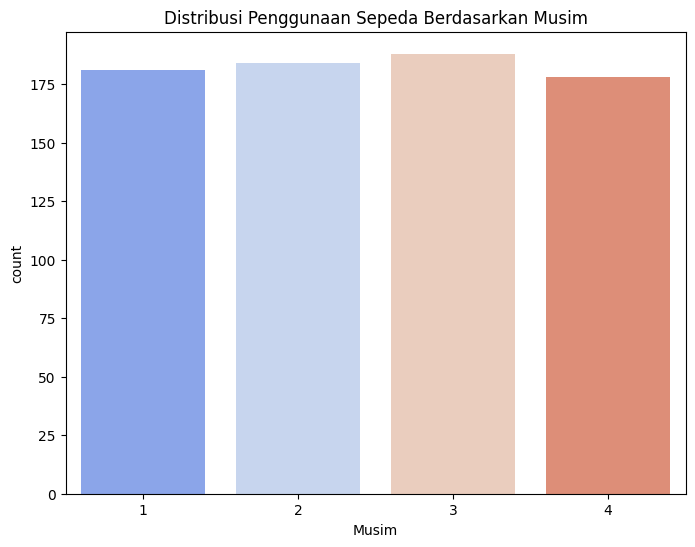

<ipython-input-3-94cbe3d6fba5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Musim', y='Jumlah Total', data=day_data, palette='coolwarm')


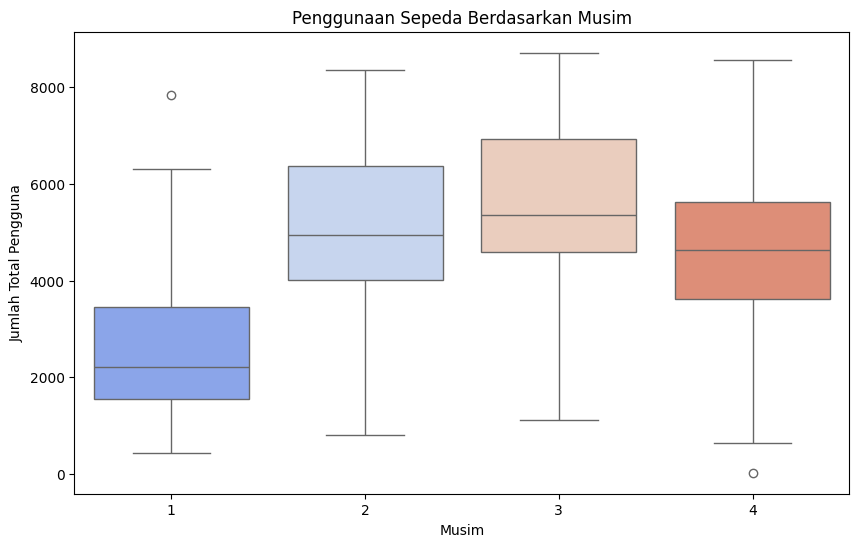

<ipython-input-3-94cbe3d6fba5>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Jam', y='Jumlah Total', data=hour_data, ci=None)


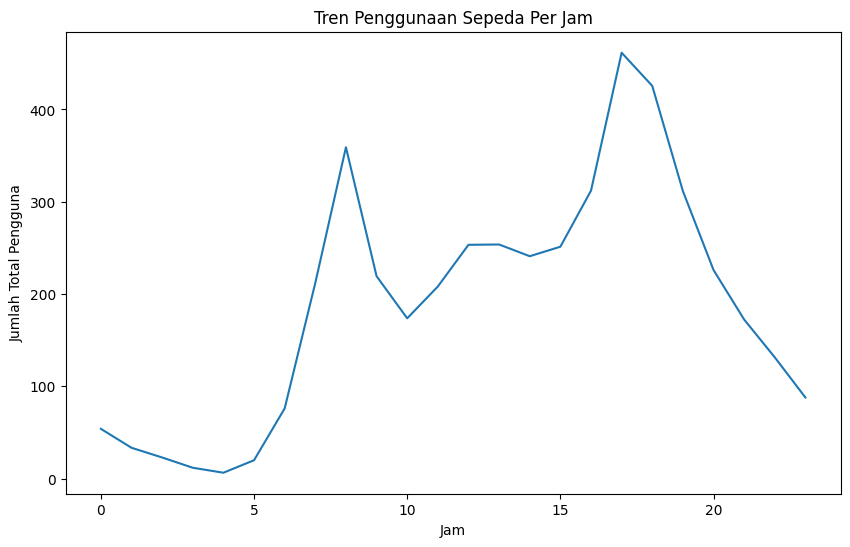

<ipython-input-3-94cbe3d6fba5>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuaca', y='Jumlah Total', data=day_data, palette='coolwarm')


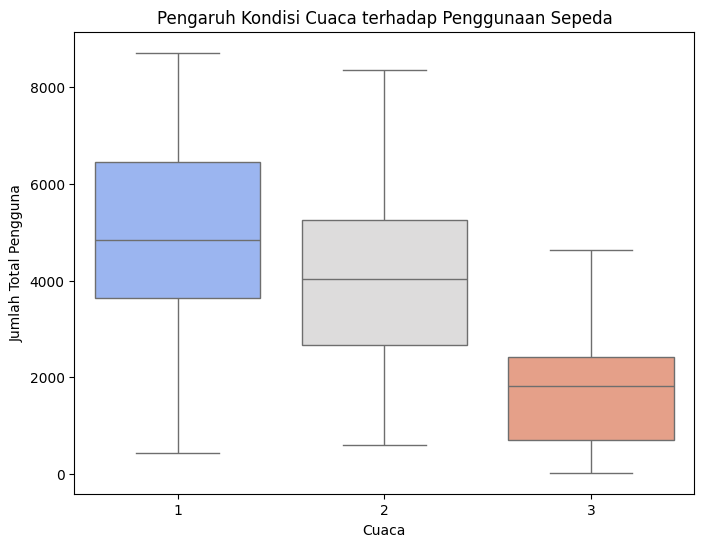

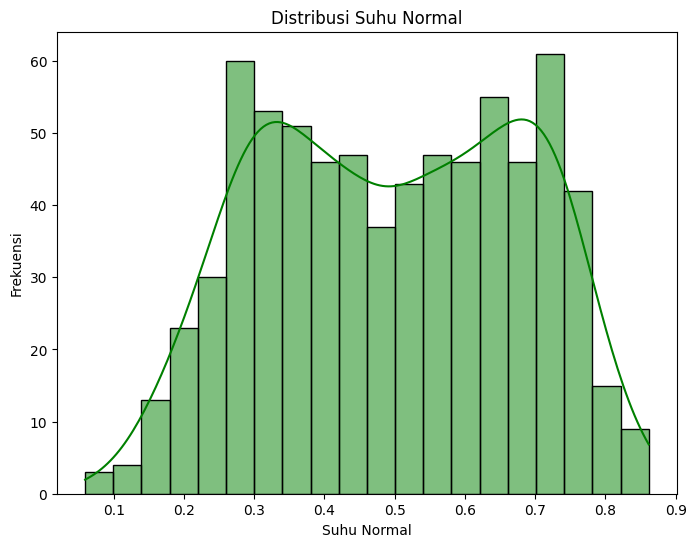

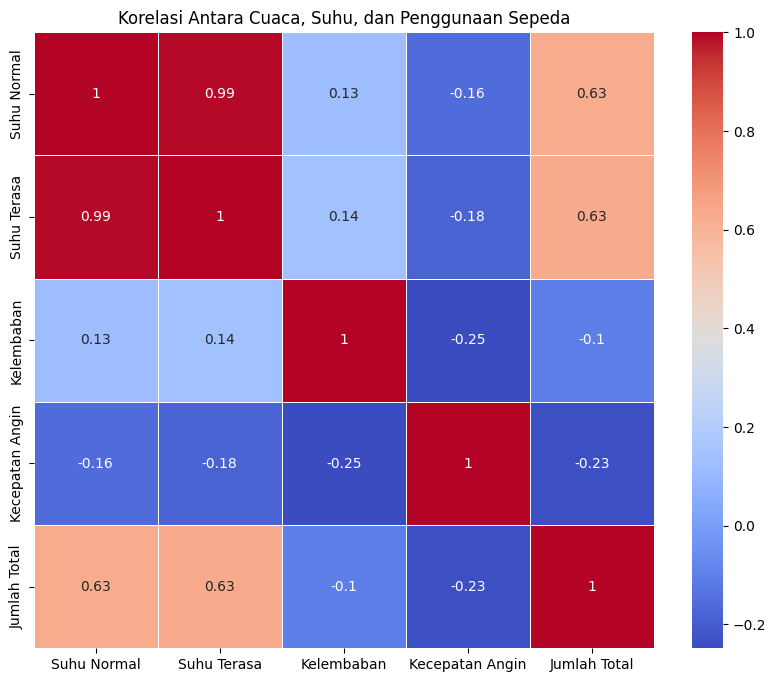

<ipython-input-3-94cbe3d6fba5>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hari Kerja', y='Jumlah Total', data=day_data, palette='Set2')


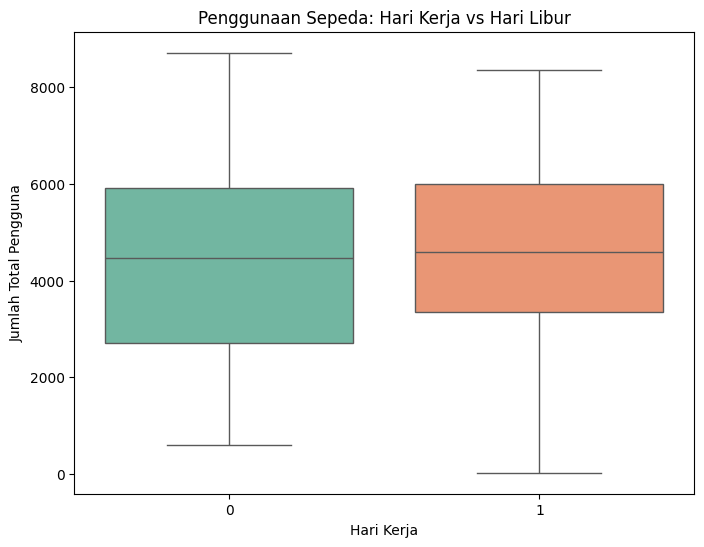

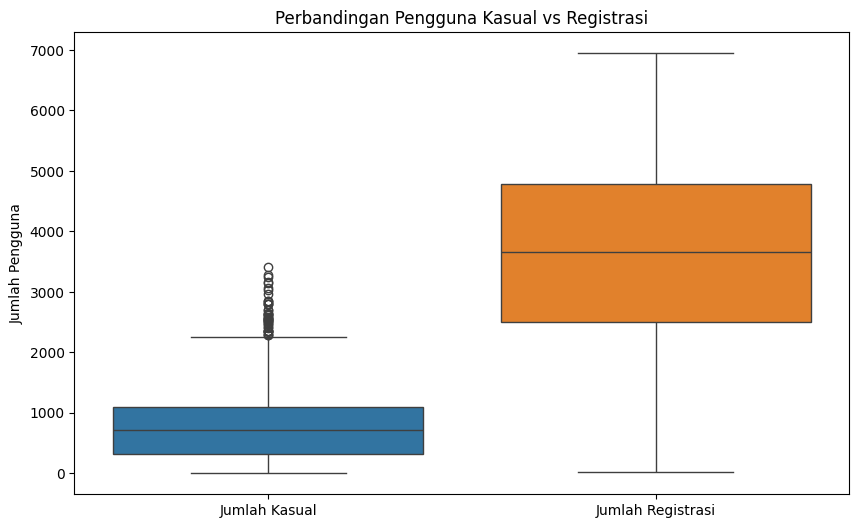

In [ ]:
#Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Membaca dataset harian dan per jam
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

#Menampilkan 5 baris pertama dari data
print("Data Harian (5 baris pertama):")
print(day_data.head())

print("\nData Per Jam (5 baris pertama):")
print(hour_data.head())

#Distribusi Penggunaan Sepeda Berdasarkan Musim
plt.figure(figsize=(8,6))
sns.countplot(x='Musim', data=day_data, palette='coolwarm')
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Musim")
plt.show()

#Tren Penggunaan Sepeda Harian Berdasarkan Musim
plt.figure(figsize=(10,6))
sns.boxplot(x='Musim', y='Jumlah Total', data=day_data, palette='coolwarm')
plt.title("Penggunaan Sepeda Berdasarkan Musim")
plt.ylabel("Jumlah Total Pengguna")
plt.show()

#Tren Penggunaan Sepeda Per Jam
plt.figure(figsize=(10,6))
sns.lineplot(x='Jam', y='Jumlah Total', data=hour_data, ci=None)
plt.title("Tren Penggunaan Sepeda Per Jam")
plt.ylabel("Jumlah Total Pengguna")
plt.show()

#Pengaruh Cuaca terhadap Penggunaan Sepeda
plt.figure(figsize=(8,6))
sns.boxplot(x='Cuaca', y='Jumlah Total', data=day_data, palette='coolwarm')
plt.title("Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda")
plt.ylabel("Jumlah Total Pengguna")
plt.show()

#Distribusi Suhu Normal
plt.figure(figsize=(8,6))
sns.histplot(day_data['Suhu Normal'], bins=20, kde=True, color='green')
plt.title("Distribusi Suhu Normal")
plt.xlabel("Suhu Normal")
plt.ylabel("Frekuensi")
plt.show()

#Korelasi antara Fitur Cuaca, Suhu, dan Penggunaan Sepeda
plt.figure(figsize=(10,8))
corr = day_data[['Suhu Normal', 'Suhu Terasa', 'Kelembaban', 'Kecepatan Angin', 'Jumlah Total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antara Cuaca, Suhu, dan Penggunaan Sepeda")
plt.show()

# Langkah 9: Penggunaan Sepeda pada Hari Kerja vs Hari Libur
plt.figure(figsize=(8,6))
sns.boxplot(x='Hari Kerja', y='Jumlah Total', data=day_data, palette='Set2')
plt.title("Penggunaan Sepeda: Hari Kerja vs Hari Libur")
plt.ylabel("Jumlah Total Pengguna")
plt.show()

# Langkah 10: Analisis Pengguna Kasual dan Registrasi
plt.figure(figsize=(10,6))
sns.boxplot(data=day_data[['Jumlah Kasual', 'Jumlah Registrasi']])
plt.title("Perbandingan Pengguna Kasual vs Registrasi")
plt.ylabel("Jumlah Pengguna")
plt.show()


**Insight:**
- Penggunaan sepeda jauh lebih tinggi pada hari kerja dibandingkan hari libur, yang menunjukkan bahwa layanan ini lebih sering digunakan untuk perjalanan rutin, seperti pergi bekerja atau sekolah, daripada untuk rekreasi.
- Dari heatmap korelasi, terlihat bahwa suhu terasa dan suhu normal memiliki korelasi positif dengan jumlah pengguna, sementara kelembaban dan kecepatan angin memiliki korelasi negatif. Artinya, semakin nyaman kondisi cuaca, semakin tinggi penggunaan sepeda.
- Tren penggunaan sepeda per jam menunjukkan puncak penggunaan terjadi pada pagi hari (sekitar jam 7-9) dan sore hari (sekitar jam 16-19). Ini menunjukkan bahwa bike-sharing digunakan terutama sebagai moda transportasi untuk perjalanan kerja, baik saat berangkat maupun pulang kerja.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Grafik ini memberikan gambaran umum tentang penggunaan sepeda berdasarkan musim, yang dapat membantu memahami bagaimana kondisi cuaca di setiap musim memengaruhi perilaku pengguna.

Box plot ini membantu untuk melihat variasi dalam penggunaan sepeda di setiap musim, serta mengidentifikasi musim dengan fluktuasi yang lebih besar atau lebih kecil dalam jumlah pengguna.

<ipython-input-4-b8c03fda118e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Musim', data=day_data, palette='coolwarm')


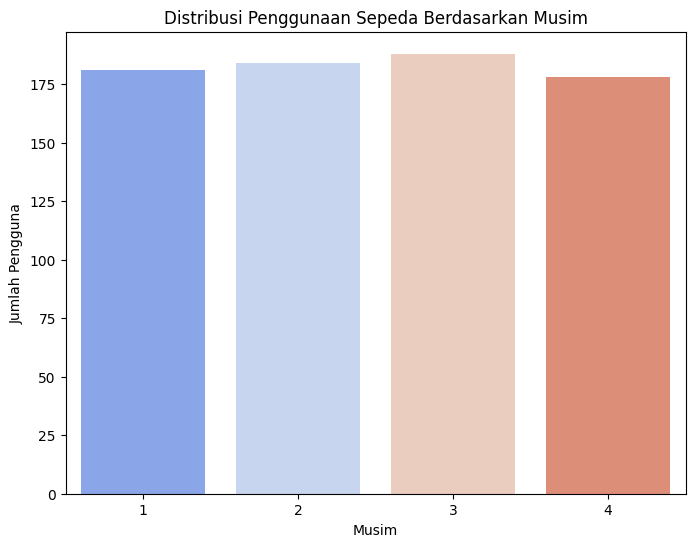

<ipython-input-4-b8c03fda118e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Musim', y='Jumlah Total', data=day_data, palette='coolwarm')


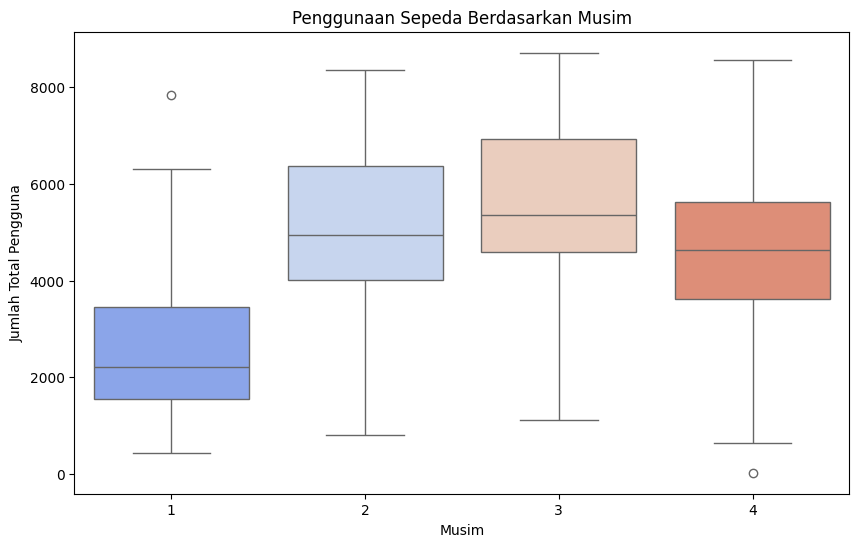

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribusi Penggunaan Sepeda Berdasarkan Musim
plt.figure(figsize=(8,6))
sns.countplot(x='Musim', data=day_data, palette='coolwarm')
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna")
plt.show()

#Tren Penggunaan Sepeda Harian Berdasarkan Musim
plt.figure(figsize=(10,6))
sns.boxplot(x='Musim', y='Jumlah Total', data=day_data, palette='coolwarm')
plt.title("Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Total Pengguna")
plt.show()


### Pertanyaan 2:

Grafik berikut menunjukkan tren penggunaan sepeda dalam satu hari, berdasarkan jumlah total pengguna pada setiap jam. Terlihat adanya dua puncak signifikan pada jam 8 pagi dan sekitar jam 17-18 sore, yang kemungkinan besar terkait dengan jam-jam sibuk, yaitu saat orang berangkat dan pulang kerja atau sekolah. Setelah jam 18, penggunaan sepeda mulai menurun secara drastis, menandakan bahwa penggunaan sepeda jauh lebih rendah di malam hari.


<ipython-input-5-ff4d82f38be3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Jam', y='Jumlah Total', data=hour_data, ci=None, marker='o', color='b')


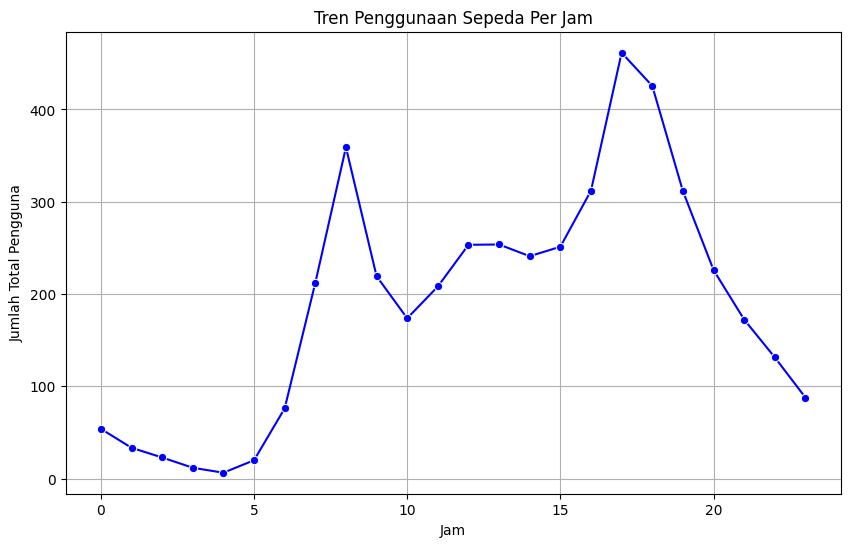

In [ ]:
ren Penggunaan Sepeda Per Jam
plt.figure(figsize=(10,6))
sns.lineplot(x='Jam', y='Jumlah Total', data=hour_data, ci=None, marker='o', color='b')
plt.title("Tren Penggunaan Sepeda Per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Total Pengguna")
plt.grid(True)
plt.show()


**Insight:**
- Penggunaan sepeda cenderung lebih tinggi pada musim panas dan musim semi, menunjukkan bahwa kondisi cuaca yang lebih nyaman mendorong lebih banyak orang untuk bersepeda.
- Tren ini menunjukkan bahwa sepeda sering digunakan sebagai transportasi komuter pada jam-jam sibuk.


## Analisis Lanjutan (Opsional)

## Conclusion

- Bagaimana distribusi penggunaan sepeda berdasarkan musim?
  Penggunaan sepeda meningkat di musim panas dan semi karena cuaca yang lebih hangat dan siang lebih panjang, membuat bersepeda lebih nyaman. Sebaliknya, penggunaan menurun di musim dingin dan gugur karena suhu yang dingin, hari lebih pendek, dan kondisi cuaca yang kurang mendukung seperti hujan atau salju.

- Bagaimana tren penggunaan sepeda per jam?
  Penggunaan sepeda mencapai puncaknya pada jam 7-9 pagi dan 4-7 sore, bertepatan dengan jam perjalanan kerja. Penggunaan lebih rendah terjadi pada tengah hari dan larut malam saat aktivitas berkurang.